# Database Merging

### Databases used
1. APID
2. UNIPROT
3. ATLAS PROTEINS

We will combine these databases into one merged one. After combining the first 2 databases, I will then subset that merged data on the atlas proteins from the macrophages. This way we only get proteins that can be affected by Mtb.

In [1]:
# Import the necessary python packages that are needed to create dataframes
import pandas as pd
import numpy as np
import gzip

In [2]:
# Load in apid data into a dataframe
apid_data = pd.read_table('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/database_files/apid/9606_Q1.txt',
                         delimiter='\t')

apid_data.head()

,InteractionID,UniprotID_A,UniprotName_A,GeneName_A,UniprotID_B,UniprotName_B,GeneName_B,ExpEvidences,Methods,Publications,3DStructures,CurationEvents
0,1495672,A0A024R0Y4,A0A024R0Y4_HUMAN,TADA2A,Q8WWY3,PRP31_HUMAN,PRPF31,1,3,1,0,3
1,1591599,A0A024R4B0,A0A024R4B0_HUMAN,SPATA3,O15354,GPR37_HUMAN,GPR37,1,3,1,0,3
2,1532709,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT,Q96D03,DDT4L_HUMAN,DDIT4L,1,2,1,0,4
3,1532710,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT,P51911,CNN1_HUMAN,CNN1,1,2,1,0,4
4,1714250,A0A024R6G0,A0A024R6G0_HUMAN,TCL6,P50222,MEOX2_HUMAN,MEOX2,1,3,1,0,3


In [3]:
# Load in uniprot dataset into a dataframe
uniprot_data = pd.read_table('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/database_files/uniprot/uniprot-homo+sapiens.tab.gz', 
                             delimiter="\t")

uniprot_data.head()

/Users/andrewpowers/miniconda3/envs/network_uo/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,14,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Entry,Entry name,Protein names,Gene names,Organism,Intramembrane,Subcellular location [CC],Topological domain,Transmembrane,Gene ontology (biological process),...,Gene ontology IDs,Cross-reference (UniPathway),Cross-reference (PathwayCommons),Cross-reference (BioCyc),Cross-reference (BRENDA),Cross-reference (SABIO-RK),Cross-reference (SignaLink),Cross-reference (SIGNOR),Cross-reference (Reactome),Cross-reference (STRING)
0,Q53XC5,Q53XC5_HUMAN,Bone morphogenetic protein 4 (Bone morphogenet...,BMP4 hCG_20967,Homo sapiens (Human),NaN,NaN,NaN,NaN,anterior/posterior axis specification [GO:0009...,...,GO:0000122; GO:0001649; GO:0001658; GO:0001759...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A8K571,A8K571_HUMAN,Bone morphogenetic protein 7 (Osteogenic prote...,BMP7 hCG_40100,Homo sapiens (Human),NaN,NaN,NaN,NaN,allantois development [GO:1905069]; axon guida...,...,GO:0001657; GO:0001707; GO:0003272; GO:0003344...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A8K660,A8K660_HUMAN,"Adiponectin (Adiponectin, C1Q and collagen dom...",ADIPOQ hCG_1784052,Homo sapiens (Human),NaN,NaN,NaN,NaN,brown fat cell differentiation [GO:0050873]; c...,...,GO:0001666; GO:0005179; GO:0005581; GO:0005615...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q5U0J5,Q5U0J5_HUMAN,cAMP responsive element binding protein 1 (cAM...,CREB1 hCG_15208,Homo sapiens (Human),NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000256|ARB...,NaN,NaN,aging [GO:0007568]; axonogenesis [GO:0007409];...,...,GO:0000785; GO:0001225; GO:0001228; GO:0001666...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5TCX1,Q5TCX1_HUMAN,Triggering receptor expressed on myeloid cells...,TREM2,Homo sapiens (Human),NaN,NaN,NaN,"TRANSMEM 175..197; /note=""Helical""; /evidenc...",amyloid-beta clearance [GO:0097242]; apoptotic...,...,GO:0001530; GO:0001934; GO:0002282; GO:0002931...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge the Dataframes

Now that I have the separate dataframes loaded in, I can merge them into one complete datafrane that has all of the info in it. 

In [4]:
# First Add the info for the first UniprotID_A 
first_pass = pd.merge(apid_data, uniprot_data, how="inner", left_on="UniprotID_A", right_on="Entry")

# Add the Second info for the interacting protein UniprotID_B
full_merge_pass = pd.merge(first_pass, uniprot_data, how="inner", left_on="UniprotID_B", right_on="Entry", suffixes=("_protA", "_protB"))

# Check the head of the merged files
full_merge_pass.shape

(139735, 58)

In [5]:
# Lets check the columns and make sure they are all unique and easy to identify
full_merge_pass.columns

Index(['InteractionID', 'UniprotID_A', 'UniprotName_A', 'GeneName_A',
       'UniprotID_B', 'UniprotName_B', 'GeneName_B', 'ExpEvidences', 'Methods',
       'Publications', '3DStructures', 'CurationEvents', 'Entry_protA',
       'Entry name_protA', 'Protein names_protA', 'Gene names_protA',
       'Organism_protA', 'Intramembrane_protA',
       'Subcellular location [CC]_protA', 'Topological domain_protA',
       'Transmembrane_protA', 'Gene ontology (biological process)_protA',
       'Gene ontology (cellular component)_protA', 'Gene ontology (GO)_protA',
       'Gene ontology (molecular function)_protA', 'Gene ontology IDs_protA',
       'Cross-reference (UniPathway)_protA',
       'Cross-reference (PathwayCommons)_protA',
       'Cross-reference (BioCyc)_protA', 'Cross-reference (BRENDA)_protA',
       'Cross-reference (SABIO-RK)_protA', 'Cross-reference (SignaLink)_protA',
       'Cross-reference (SIGNOR)_protA', 'Cross-reference (Reactome)_protA',
       'Cross-reference (STRING)_

### Subset the Merged Dataframe

Now that we have a dataframe that has all of the relevant info in it, we can subset the dataframe by a macrophage dataframe that we got from protein atlas.

Why are we doing this?

It is because Mtb enters and interacts with proteins within the Macrophage. 
 https://www.sciencedirect.com/science/article/pii/S1097276518305574?via%3Dihub
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3867229/

In [6]:
# Load in the proteinatlas dataset
proteinatlas = pd.read_table('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/database_files/proteinatlas/proteinatlas_macrophage_genes.tsv',
                            delimiter='\t')

proteinatlas.head()

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Single Cell Type RNA - Rod photoreceptor cells [NX],Single Cell Type RNA - Sertoli cells [NX],Single Cell Type RNA - Smooth muscle cells [NX],Single Cell Type RNA - Spermatocytes [NX],Single Cell Type RNA - Spermatogonia [NX],Single Cell Type RNA - Suprabasal keratinocytes [NX],Single Cell Type RNA - Syncytiotrophoblasts [NX],Single Cell Type RNA - T-cells [NX],Single Cell Type RNA - Undifferentiated cells [NX],Single Cell Type RNA - Urothelial cells [NX]
0,CATSPER1,CATSPER,ENSG00000175294,Cation channel sperm associated 1,Q8NEC5,11,66016752-66026517,"Disease related genes, Predicted membrane prot...","Calcium transport, Differentiation, Ion transp...","Calcium channel, Developmental protein, Ion ch...",...,0.0,0.0,0.1,0.5,0.4,0.3,0.3,4.3,0.0,0.3
1,HIST1H1B,"H1.5, H1b, H1F5, H1s-3",ENSG00000184357,Histone cluster 1 H1 family member b,P16401,6,27866849-27867529,"Plasma proteins, Predicted intracellular proteins",NaN,DNA-binding,...,0.0,0.0,0.0,0.1,1.2,0.0,0.6,1.8,0.9,0.1
2,FCER1A,FCE1A,ENSG00000179639,Fc fragment of IgE receptor Ia,P12319,1,159289714-159308224,"FDA approved drug targets, Predicted membrane ...",NaN,"IgE-binding protein, Receptor",...,0.0,12.9,0.6,0.0,0.2,29.7,0.0,0.0,0.0,0.0
3,ADAMDEC1,M12.219,ENSG00000134028,ADAM like decysin 1,O15204,8,24384285-24406013,"Plasma proteins, Predicted intracellular prote...",NaN,"Hydrolase, Metalloprotease, Protease",...,0.0,0.0,0.0,0.0,0.0,0.3,0.1,0.0,0.0,0.0
4,STAC3,MGC2793,ENSG00000185482,SH3 and cysteine rich domain 3,Q96MF2,12,57243453-57251193,"Disease related genes, Predicted intracellular...",NaN,NaN,...,1.9,0.0,0.3,2.4,1.1,0.3,1.1,1.3,1.1,0.3


In [7]:
# Compare if full_merge_pass proteins are in proteinatlas df
macrophage_interaction_protein_database = full_merge_pass[(full_merge_pass.UniprotID_A.isin(proteinatlas.Uniprot) | full_merge_pass.UniprotID_B.isin(proteinatlas.Uniprot))]

In [8]:
print("Shape:", macrophage_interaction_protein_database.shape, sep="\t")


Shape:	(4787, 58)


In [9]:
macrophage_interaction_protein_database.head(20)

,InteractionID,UniprotID_A,UniprotName_A,GeneName_A,UniprotID_B,UniprotName_B,GeneName_B,ExpEvidences,Methods,Publications,...,Gene ontology IDs_protB,Cross-reference (UniPathway)_protB,Cross-reference (PathwayCommons)_protB,Cross-reference (BioCyc)_protB,Cross-reference (BRENDA)_protB,Cross-reference (SABIO-RK)_protB,Cross-reference (SignaLink)_protB,Cross-reference (SIGNOR)_protB,Cross-reference (Reactome)_protB,Cross-reference (STRING)_protB
9,1495411,O43586,PPIP1_HUMAN,PSTPIP1,Q8WWY3,PRP31_HUMAN,PRPF31,3,5,3,...,GO:0000244; GO:0000398; GO:0003723; GO:0005634...,NaN,Q8WWY3;,NaN,NaN,NaN,NaN,NaN,R-HSA-72163;,9606.ENSP00000324122;
146,1591593,Q02930,CREB5_HUMAN,CREB5,O15354,GPR37_HUMAN,GPR37,1,3,1,...,GO:0000151; GO:0004930; GO:0005737; GO:0005783...,NaN,O15354;,NaN,NaN,NaN,NaN,O15354;,R-HSA-375276;R-HSA-418594;,9606.ENSP00000306449;
245,2175074,P09917,LOX5_HUMAN,ALOX5,P50222,MEOX2_HUMAN,MEOX2,1,1,1,...,GO:0000785; GO:0000978; GO:0000981; GO:0001228...,NaN,P50222;,NaN,NaN,NaN,NaN,P50222;,NaN,9606.ENSP00000262041;
345,1706672,Q8NF50,DOCK8_HUMAN,DOCK8,P50222,MEOX2_HUMAN,MEOX2,2,4,2,...,GO:0000785; GO:0000978; GO:0000981; GO:0001228...,NaN,P50222;,NaN,NaN,NaN,NaN,P50222;,NaN,9606.ENSP00000262041;
389,1709225,Q9HBI0,PARVG_HUMAN,PARVG,P50222,MEOX2_HUMAN,MEOX2,2,4,2,...,GO:0000785; GO:0000978; GO:0000981; GO:0001228...,NaN,P50222;,NaN,NaN,NaN,NaN,P50222;,NaN,9606.ENSP00000262041;
423,1711549,Q9Y4H4,GPSM3_HUMAN,GPSM3,P50222,MEOX2_HUMAN,MEOX2,1,4,1,...,GO:0000785; GO:0000978; GO:0000981; GO:0001228...,NaN,P50222;,NaN,NaN,NaN,NaN,P50222;,NaN,9606.ENSP00000262041;
447,2178864,P08631,HCK_HUMAN,HCK,P60409,KR107_HUMAN,KRTAP10-7,1,1,1,...,GO:0005829; GO:0031424; GO:0042802; GO:0045095,NaN,P60409;,NaN,NaN,NaN,NaN,NaN,R-HSA-6805567;,9606.ENSP00000476821;
585,1711754,P08631,HCK_HUMAN,HCK,P60411,KR109_HUMAN,KRTAP10-9,2,4,2,...,GO:0005829; GO:0031424; GO:0045095,NaN,P60411;,NaN,NaN,NaN,NaN,NaN,R-HSA-6805567;,9606.ENSP00000381009;
647,1680906,Q8NEC5,CTSR1_HUMAN,CATSPER1,P60411,KR109_HUMAN,KRTAP10-9,2,4,2,...,GO:0005829; GO:0031424; GO:0045095,NaN,P60411;,NaN,NaN,NaN,NaN,NaN,R-HSA-6805567;,9606.ENSP00000381009;
705,2178852,P08631,HCK_HUMAN,HCK,P60410,KR108_HUMAN,KRTAP10-8,1,1,1,...,GO:0005829; GO:0031424; GO:0042802; GO:0045095,NaN,P60410;,NaN,NaN,NaN,NaN,NaN,R-HSA-6805567;,9606.ENSP00000335565;


## NetworkX Graphing

I will have to create a list of tuples that have the connections. I will do this by taking creating a tuple of `(UniprotID_A, UniprotID_B)` from the dataframe.

In [15]:
# pull out the individual arrays
protA = np.array(macrophage_interaction_protein_database.UniprotID_A)
protB = np.array(macrophage_interaction_protein_database.UniprotID_B)

In [17]:
# Create a list of tuples containing the edge interactions
protein_edges = list()
for i in range(0, len(protA)):
    protein_edges.append((protA[i], protB[i]))

In [18]:
# Check the list to make sure it is what I expect it to be
protein_edges[1:5]

[('Q02930', 'O15354'),
 ('P09917', 'P50222'),
 ('Q8NF50', 'P50222'),
 ('Q9HBI0', 'P50222')]

In [35]:
# Import networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

In [32]:
# Create the Network graph and populate it with the protein_edges list 
G=nx.Graph(name="Macrophage Protein Interaction Graph")
G.add_edges_from(protein_edges)

In [33]:
nx.info(G)

"Graph named 'Macrophage Protein Interaction Graph' with 3058 nodes and 4787 edges"

## Network design

I was having troubling making `nx.draw_circular`, `_spring`, and `_spectral` to draw large enough to actually see them so I googled around how some people plotted their own networks. I found this: https://towardsdatascience.com/visualizing-protein-networks-in-python-58a9b51be9d5 
Which I used below. The two networks are the same just the figsize is different.

However, below this I do figure out how to graph the `nx.draw_circular`, `_spring`, and `_spectral` graphs.

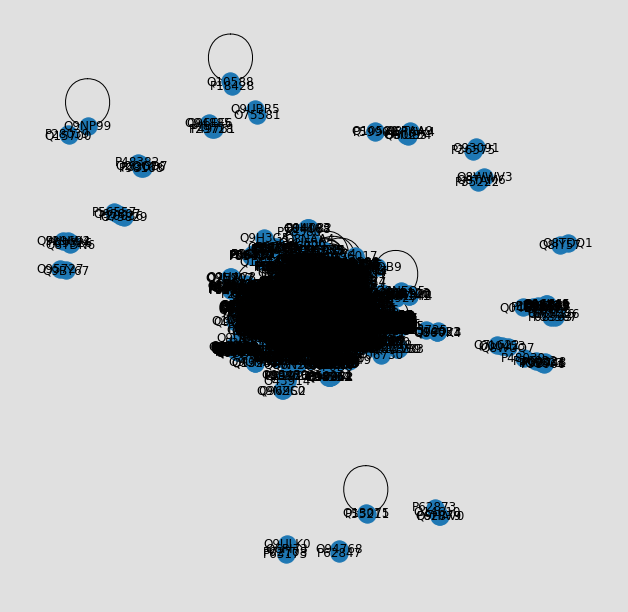

In [37]:
pos = nx.spring_layout(G)
plt.figure(figsize=(11,11), facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

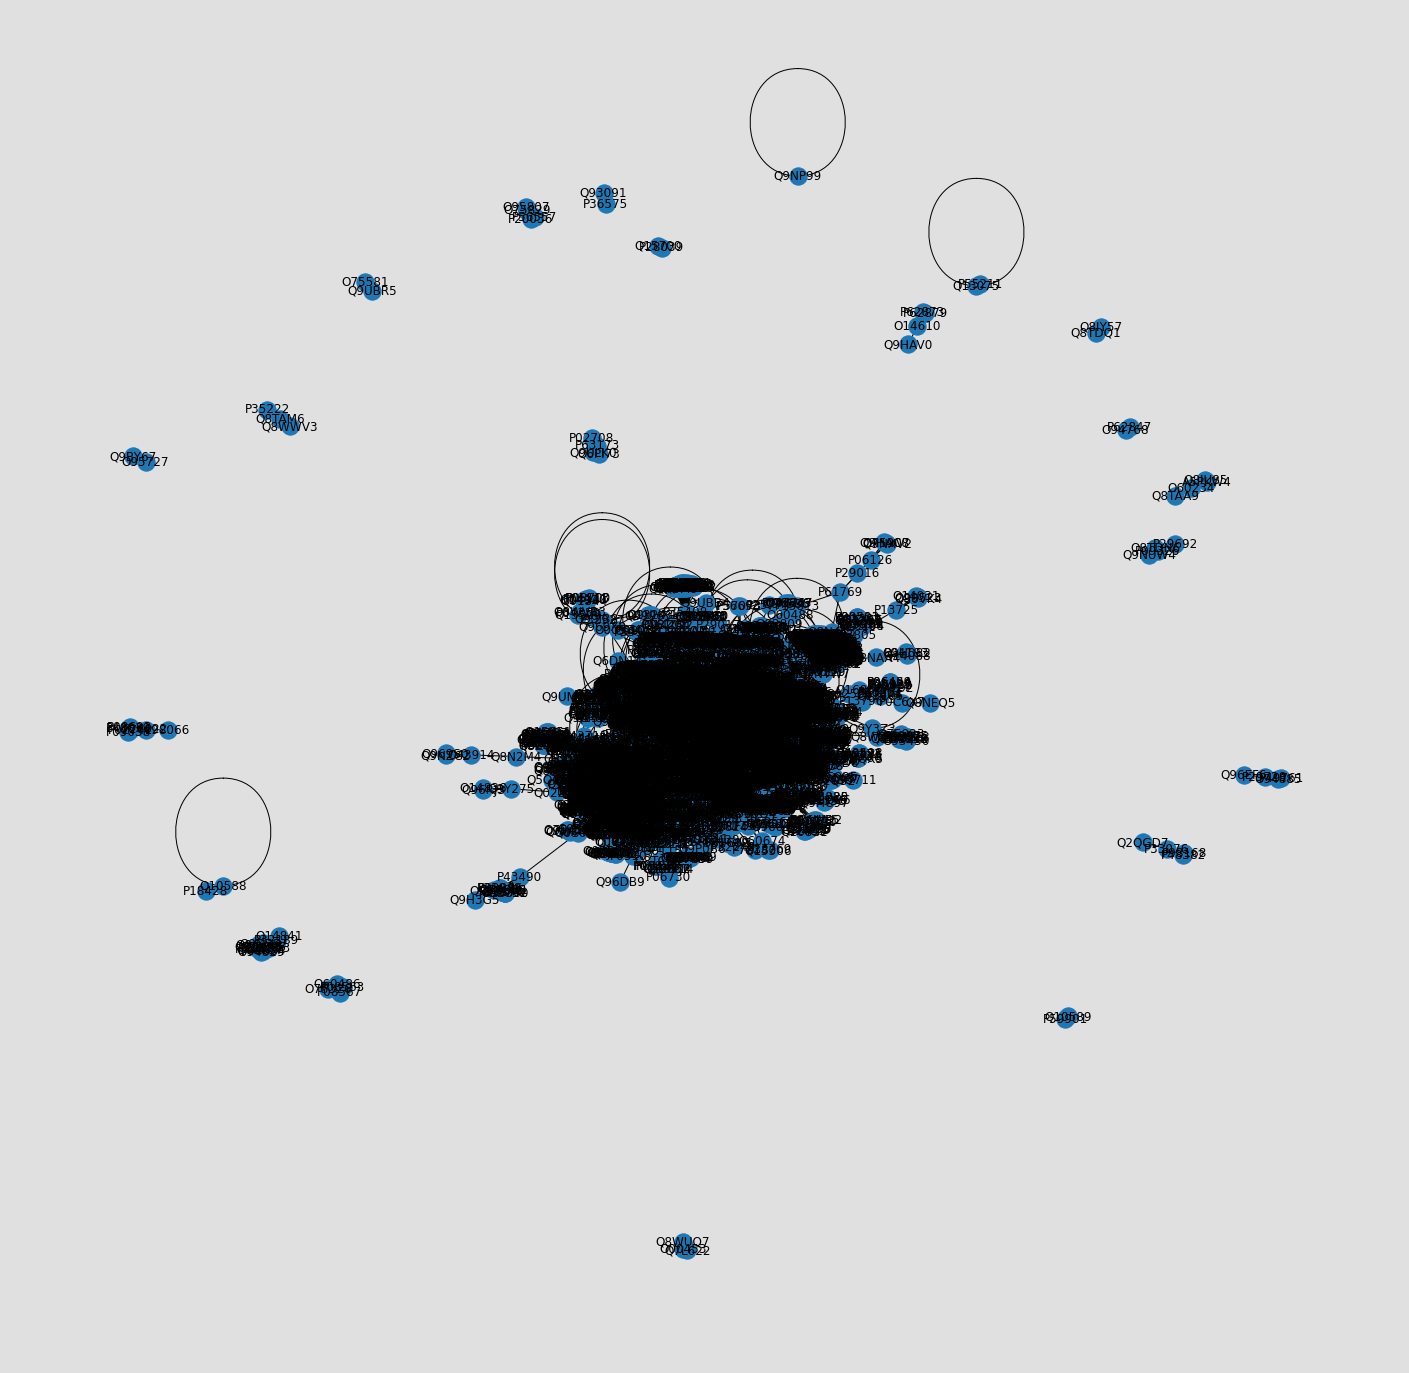

In [38]:
pos = nx.spring_layout(G)
plt.figure(figsize=(25,25), facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

## Playing Around
Trying the `nx.draw_circular`, `_spring`, and `_spectral`

## Circular Graph

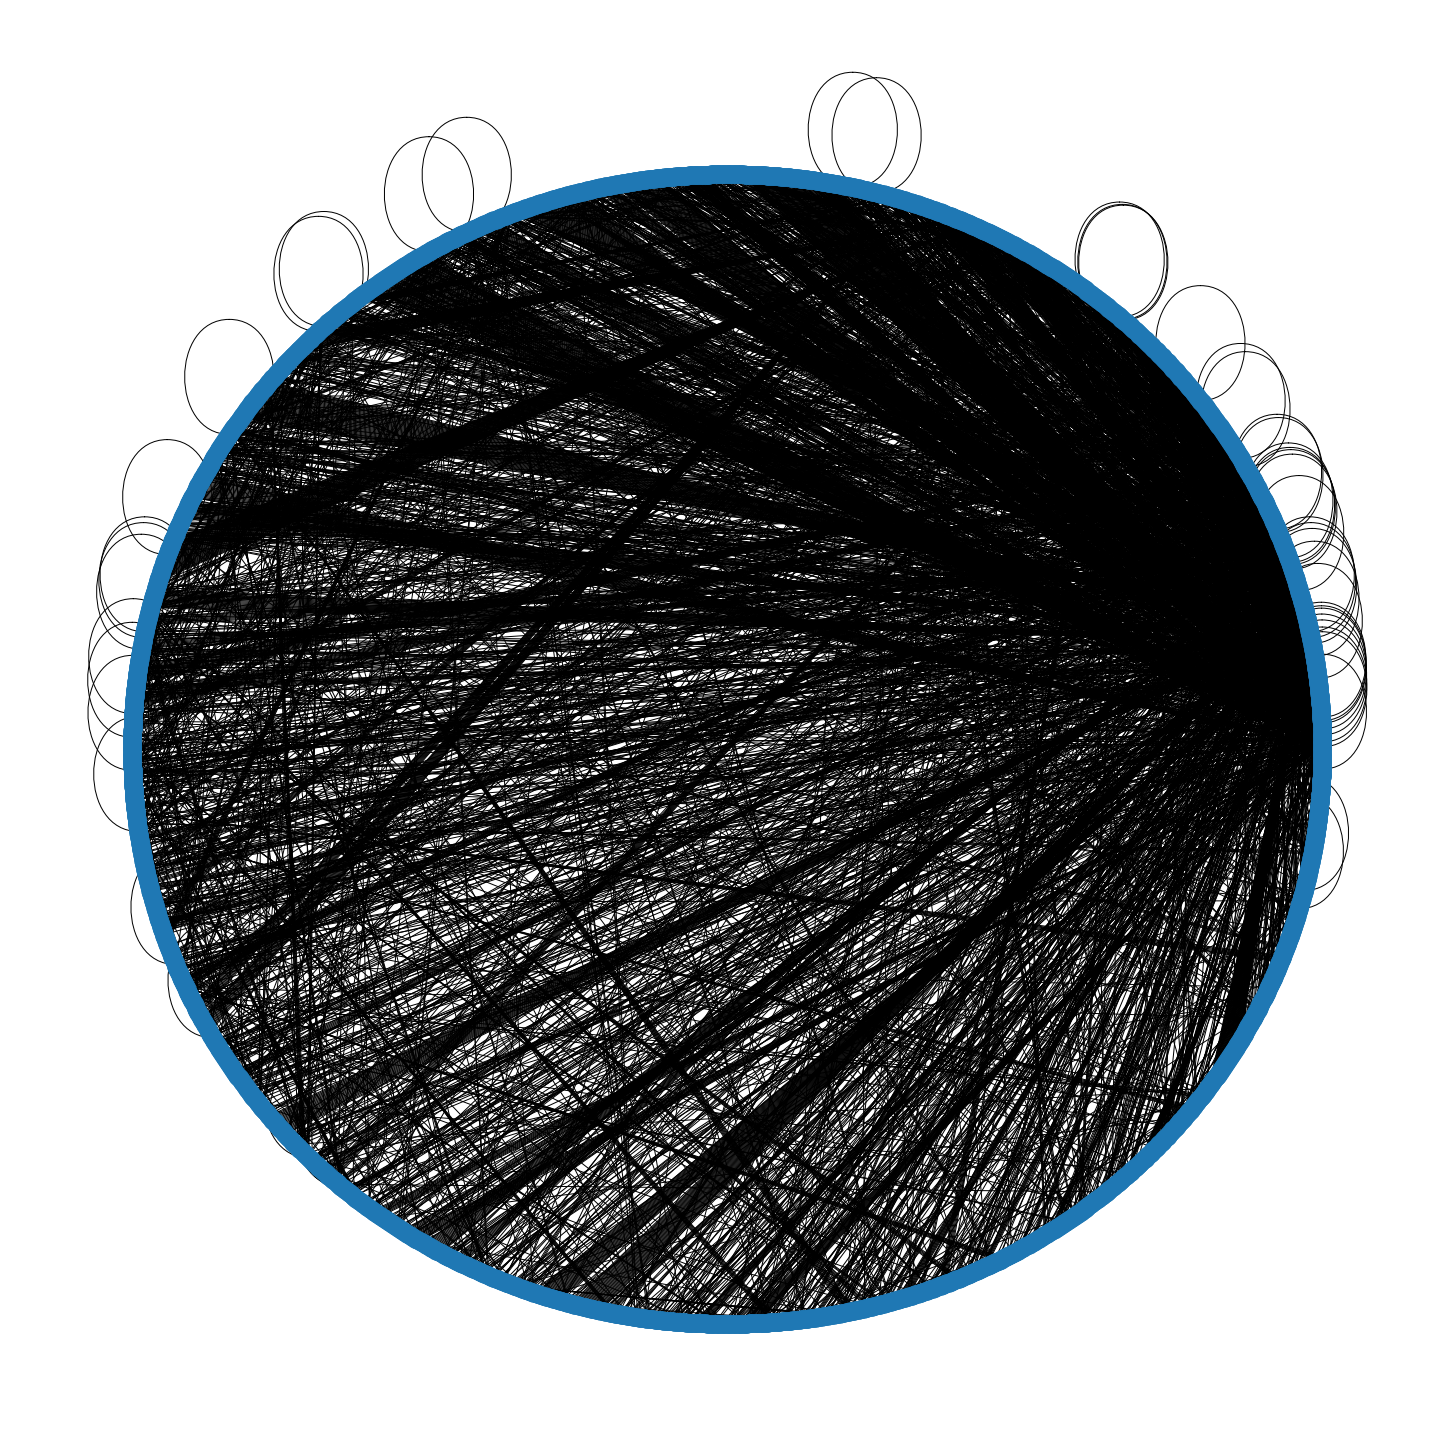

In [40]:
plt.figure(figsize=(20,20), facecolor=[0.7,0.7,0.7,0.4])
nx.draw_circular(G)
plt.axis('off')
plt.show()

## Spring Graph

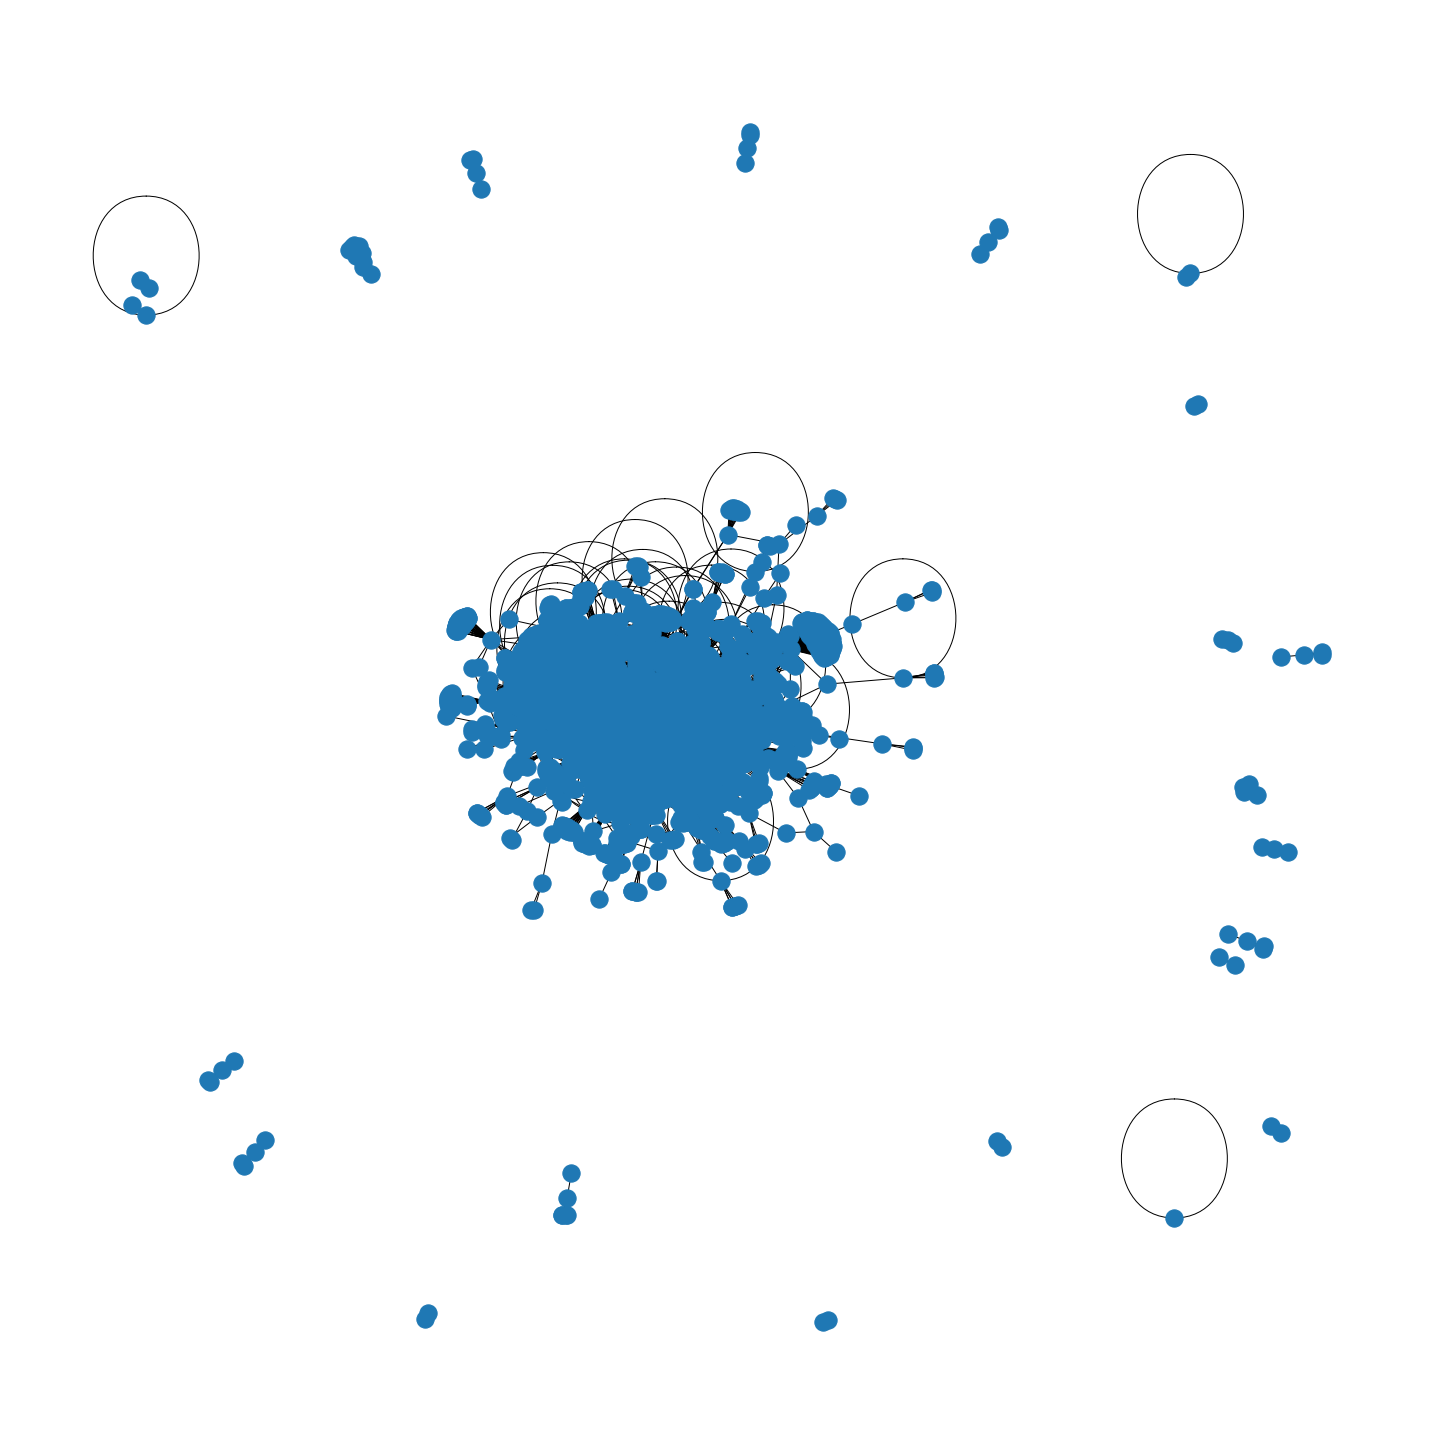

In [45]:
plt.figure(figsize=(20,20))
nx.draw_spring(G)
plt.axis('off')
plt.show()

## Spectral Graph

Still having problems with the Spectral Graph. Will talk with Parisa about it.

In [44]:
nx.draw_spectral(G)
plt.axis('off')
plt.show()

ArpackNoConvergence: ARPACK error -1: No convergence (30581 iterations, 1/3 eigenvectors converged)